# Model Building Criteria 

The travel company "Visit with us", identified that they want to create a prediction model using previously available data to reduce marketing cost (OPEX - Operating Expenditure).

There are 2 cases where the prediction model can give incorrect predictions:
1. Predicts that a customer **will take** the new plan but when Sales reaches out and pitches they **decline** the offer.
    * False Positive (Type 1 Error)
    * Cost to company - Wastage of operating expenditure in Marketing and Sales.

2. Predicts that a customer **will not take** the new plan. Customer ignored but a highly suitable candidate willing and interested.
    * False Negative (Type 2 Error)
    * Cost to company - Loss of possible customer, Revenue Loss.

Of these 2 cases, the most expensive one is **Case 2** - **False Negative**, as lost business opportunity will hurt the bottomline of any business enterprise.

Therefore, minimizing the **False Negatives** are critical.   
<font color='red'>The metric to be maximized is **Recall**.

---

# Model Building Preparation

**Define functions**
* Metric scores(accuracy, recall and precision)
* Confusion matrix

In [91]:
def metrics_summary(model,flag=True):
    
    a = []  # defining an empty list to store train and test results
    
    # Model Predictions
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    
    # Accuracy - Train and Test 
    train_accuracy = model.score(X_train, y_train)
    test_accuracy = model.score(X_test, y_test)
    
    # Recall - Train and Test 
    train_recall = metrics.recall_score(y_train, pred_train)
    test_recall = metrics.recall_score(y_test, pred_test)
    
    # Precision - Train and Test 
    train_precision = metrics.precision_score(y_train, pred_train)
    test_precision = metrics.precision_score(y_test, pred_test)
    
    # Appending metrics to list "a"
    a.append(train_accuracy)
    a.append(test_accuracy)
    a.append(train_recall)
    a.append(test_recall)
    a.append(train_precision)
    a.append(test_precision)    
   
    # If the flag is set to True then only the following print statements will be dispayed
    if flag == True:
        print("Accuracy on training set : ", model.score(X_train, y_train))
        print("Accuracy on test set : ", model.score(X_test, y_test))
        print("Recall on training set : ", metrics.recall_score(y_train, pred_train))
        print("Recall on test set : ", metrics.recall_score(y_test, pred_test))
        print("Precision on training set : ", metrics.precision_score(y_train, pred_train))
        print("Precision on test set : ", metrics.precision_score(y_test, pred_test))
    else:
        return a  # returning the list with train and test scores   

In [92]:
def make_confusion_matrix(model, y_actual, labels=[1, 0]):
    '''
    model : classifier to predict values of X
    y_actual : ground truth  
    
    '''
    y_predict = model.predict(X_test)
    cm = metrics.confusion_matrix(y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(
        cm,
        index=[i for i in ["Actual - No", "Actual - Yes"]],
        columns=[i for i in ['Predicted - No', 'Predicted - Yes']])
    group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
    group_percentages = [
        "{0:.2%}".format(value) for value in cm.flatten() / np.sum(cm)
    ]
    labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_counts, group_percentages)]
    labels = np.asarray(labels).reshape(2, 2)
    plt.figure(figsize=(5, 5))
    sns.heatmap(df_cm, annot=labels, fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

In [93]:
def confusion_matrix_metrics_summary(model):
    make_confusion_matrix(model,y_test)
    metrics_summary(model) 

**Confusion Matrix definition:**

| **Parameter**| **Description** | 
| :-: | :-: |
| **True Positive** | Predict **potential** customer and the customer **purchased** the travel package|
| **False Positive** | Predict **potential** customer and the customer **did not purchase** the travel package|
| **True Negative** | Predict **ineligible** customer and the customer **did not purchase** the travel package|
| **False Negative** | Predict **ineligible** customer and the customer **purchased** the travel package|

---

# Model Building - Bagging

Before model building is started, we must split the dataset into the Independent and Dependent variables.
* Independent variables - predictors
* Dependent variables - response

In this project, the response variable is the `ProdTaken` , and the predictors are all the other variables.

For **Bagging** we shall use the dataframe **data** which has outliers

Model Building - Approach
1. Data preparation - Partition the data into train and test set.
3. Decision Tree Modeling
3. Bagging Ensemble
4. Random Forest Ensemble

---

## Model Building Preparation

**Separating Independent and Dependent variables**

In [94]:
# Separating Independent and Dependent variables

# Independant variables
X = data.drop('ProdTaken', axis=1)
# Dependent variable
y = data['ProdTaken']

In [95]:
# Convert categorical variables to dummy variables
# Keep all dummy variables as the Bagging methods use Decision Trees
X = pd.get_dummies(X)

In [96]:
# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.30,
                                                    stratify=y,
                                                    random_state=1)

**Lets check Dependent variable ratio in split data**

In [97]:
print("Training True Values    : {0} ({1:0.2f}%)".format(
    len(y_train[y_train[:] == 1]),
    (len(y_train[y_train[:] == 1]) / len(y_train)) * 100))
print("Training False Values   : {0} ({1:0.2f}%)".format(
    len(y_train[y_train[:] == 0]),
    (len(y_train[y_train[:] == 0]) / len(y_train)) * 100))

print('--' * 55)

print("Test True Values        : {0} ({1:0.2f}%)".format(
    len(y_test[y_test[:] == 1]),
    (len(y_test[y_test[:] == 1]) / len(y_test)) * 100))
print("Test False Values       : {0} ({1:0.2f}%)".format(
    len(y_test[y_test[:] == 0]),
    (len(y_test[y_test[:] == 0]) / len(y_test)) * 100))

Training True Values    : 644 (18.82%)
Training False Values   : 2777 (81.18%)
--------------------------------------------------------------------------------------------------------------
Test True Values        : 276 (18.81%)
Test False Values       : 1191 (81.19%)


---

## Decision Tree Model

In [98]:
# Make the Decision Tree model
dtree = DecisionTreeClassifier()

# Fit Model to training data.
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

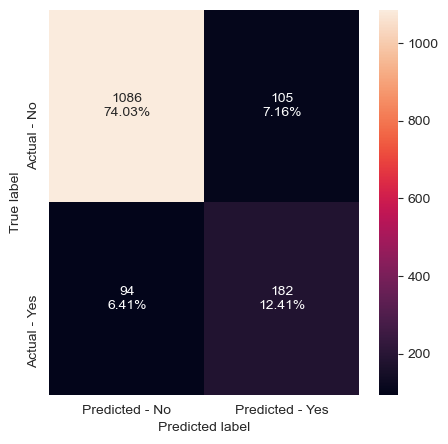

Accuracy on training set :  1.0
Accuracy on test set :  0.8643490115882754
Recall on training set :  1.0
Recall on test set :  0.6594202898550725
Precision on training set :  1.0
Precision on test set :  0.6341463414634146


In [99]:
confusion_matrix_metrics_summary(dtree)

* Model overfit on the Training data. Recall on Test data is 0.65

---

**DecisionTreeClassifier function with reverse weighting of each class**

Since dataset is misbalanced, let's reverse the weightingh of the target variable.

In [100]:
# Make the weighted DecisionTree Classifier model
dtree_wt = DecisionTreeClassifier(class_weight={
    0: 0.188,
    1: 0.812
},
                                  random_state=1)

# Fit Model to training data.
dtree_wt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.188, 1: 0.812}, random_state=1)

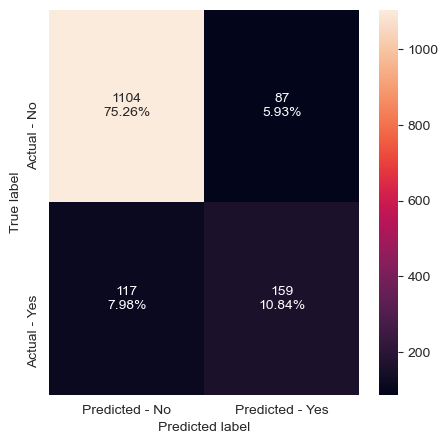

Accuracy on training set :  1.0
Accuracy on test set :  0.8609406952965235
Recall on training set :  1.0
Recall on test set :  0.5760869565217391
Precision on training set :  1.0
Precision on test set :  0.6463414634146342


In [101]:
confusion_matrix_metrics_summary(dtree_wt)

* After reversing class weights, the decision tree is still overfitting on the Training dataset.
* Recall on Test set has decreased from 0.66 to 0.58

---

### Reducing over fitting (Regularization)

**GridSearch**

* Grid search is a tuning technique that attempts to compute the optimum values of hyperparameters. 
* The parameters of the estimator/model used to apply these methods are optimized by cross-validated grid-search over a parameter grid.

In [102]:
# Choose the type of classifier.
estimator = DecisionTreeClassifier()

# Grid of parameters to choose from
parameters = {'max_depth': list(np.arange(2,20)) + [None], 
              'min_samples_leaf': [1, 3, 5, 7, 10],
              'max_leaf_nodes' : [2, 3, 5, 10, 15] + [None],
              'min_impurity_decrease': [0.001, 0.01, 0.1, 0.0]
             }


# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
dtree_gridCV = estimator.fit(X_train, y_train)

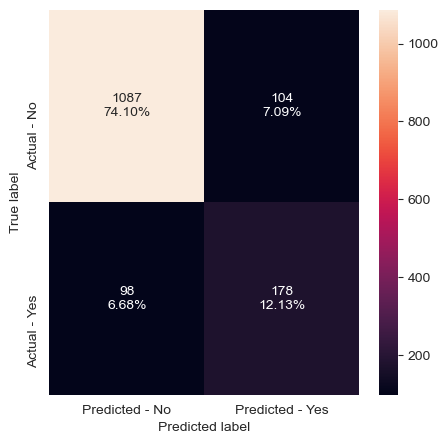

Accuracy on training set :  1.0
Accuracy on test set :  0.8623040218132243
Recall on training set :  1.0
Recall on test set :  0.644927536231884
Precision on training set :  1.0
Precision on test set :  0.6312056737588653


In [103]:
confusion_matrix_metrics_summary(dtree_gridCV)

* After using GridSearchCV, there is still overfitting but the Recall on the Test data has decreased from 0.65 (no hypertuning) to 0.64

---

In [104]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print(pd.DataFrame(dtree_gridCV.feature_importances_, columns=[
      "Imp"], index=X_train.columns).sort_values(by='Imp', ascending=False))

                                           Imp
MonthlyIncome                         0.237084
Age                                   0.166901
NumberOfTrips                         0.089520
Designation_Executive                 0.073366
Passport                              0.059067
CityTier                              0.058004
PreferredPropertyStar                 0.041529
NumberOfPersonVisited                 0.036289
NumberOfChildrenVisited               0.029079
MaritalStatus_Single                  0.023656
Occupation_Salaried                   0.020345
Occupation_Large Business             0.019714
MaritalStatus_Married                 0.015755
PreferredLoginDevice_Company Invited  0.015433
Gender_Male                           0.015091
OwnCar                                0.013347
Occupation_Small Business             0.013313
MaritalStatus_Divorced                0.012387
Designation_Senior Manager            0.012355
Gender_Female                         0.011186
PreferredLogi

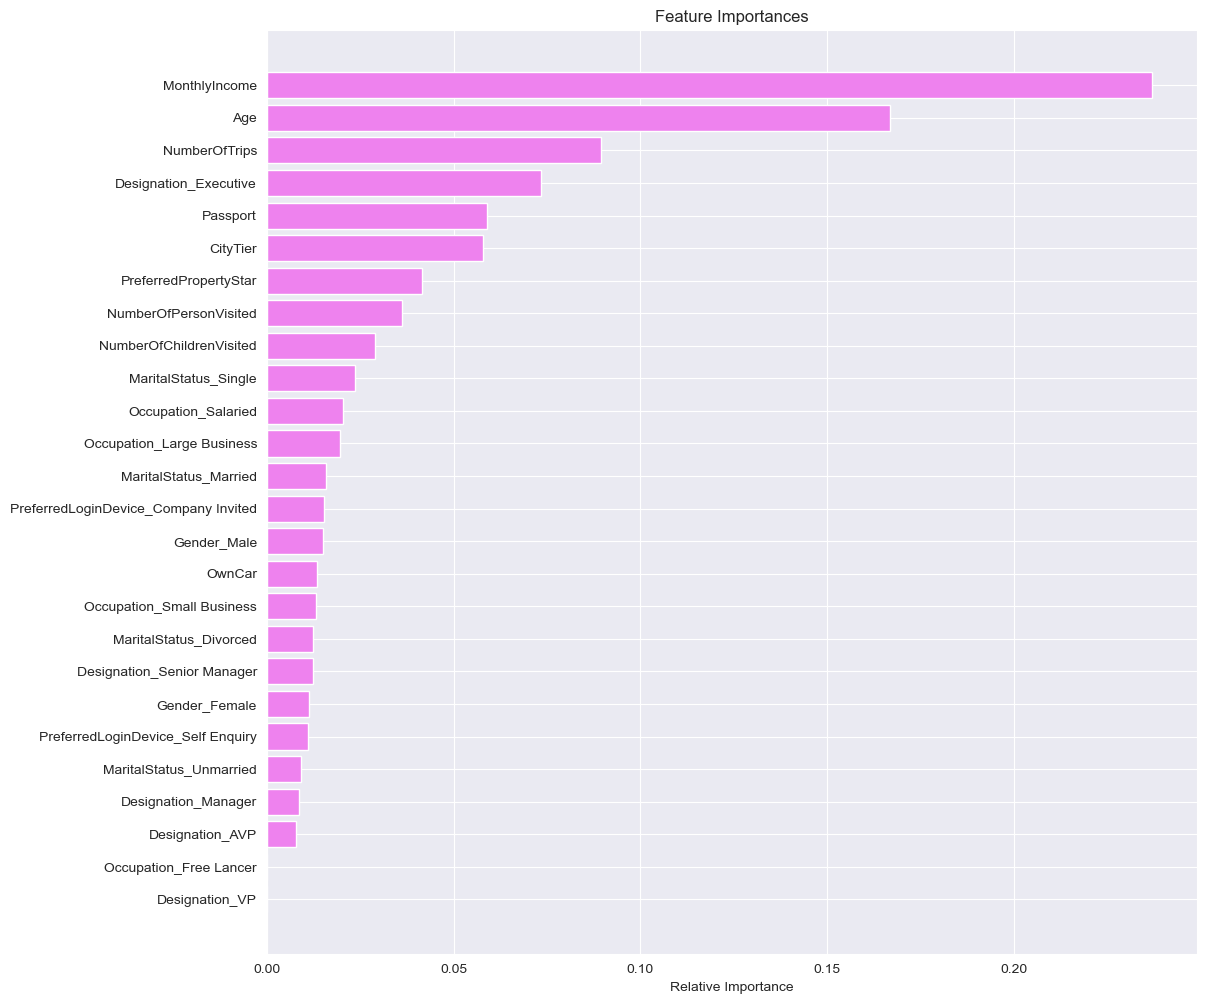

In [105]:
feature_names = X_train.columns
importances = dtree_gridCV.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

---

## Bagging Classifier

In [106]:
# Make the Bagging Classifier model
bagging = BaggingClassifier(random_state=1)
# Fit Model to training data.
bagging.fit(X_train,y_train)

BaggingClassifier(random_state=1)

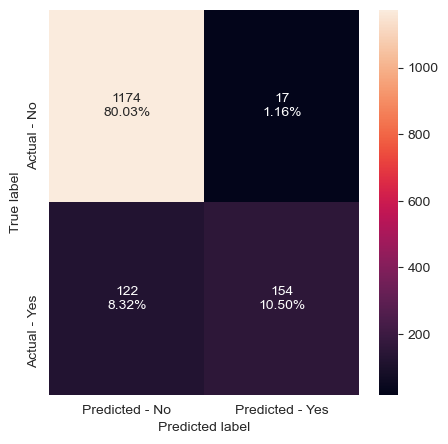

Accuracy on training set :  0.9929845074539608
Accuracy on test set :  0.9052488070892979
Recall on training set :  0.9642857142857143
Recall on test set :  0.5579710144927537
Precision on training set :  0.9983922829581994
Precision on test set :  0.9005847953216374


In [107]:
confusion_matrix_metrics_summary(bagging)

* Bagging classifier is giving a better accuracy than decision tree but is performing poorly on the test set in terms of recall.

---

**Bagging Classifier with weighted decision tree**

In [108]:
bagging_wt = BaggingClassifier(base_estimator=DecisionTreeClassifier(
    class_weight={
        0: 0.188,
        1: 0.812
    }, random_state=1),
    random_state=1)
bagging_wt.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight={0: 0.188,
                                                                      1: 0.812},
                                                        random_state=1),
                  random_state=1)

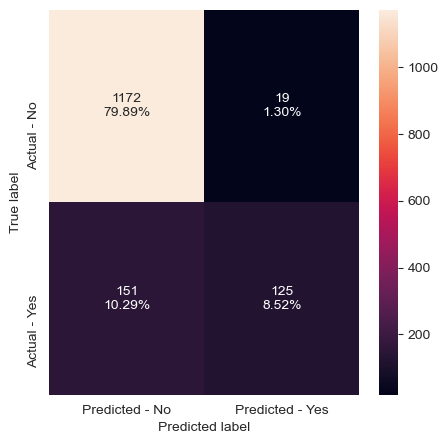

Accuracy on training set :  0.9915229465068693
Accuracy on test set :  0.8841172460804363
Recall on training set :  0.9565217391304348
Recall on test set :  0.4528985507246377
Precision on training set :  0.9983792544570502
Precision on test set :  0.8680555555555556


In [109]:
confusion_matrix_metrics_summary(bagging_wt)

* Performance has decreased when using inverting the class weights for Bagging.

---

### Hyperparameter Tuning

In [110]:
# Choose the type of classifier.
bagging_tuned = RandomForestClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    'max_depth': [4, 6, 8, 10, None],
    'max_features': ['sqrt', 'log2', None],
    'n_estimators': [80, 90, 100, 110, 120]
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(bagging_tuned, parameters, scoring=scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
bagging_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
bagging_tuned.fit(X_train, y_train)

RandomForestClassifier(max_features=None, n_estimators=110, random_state=1)

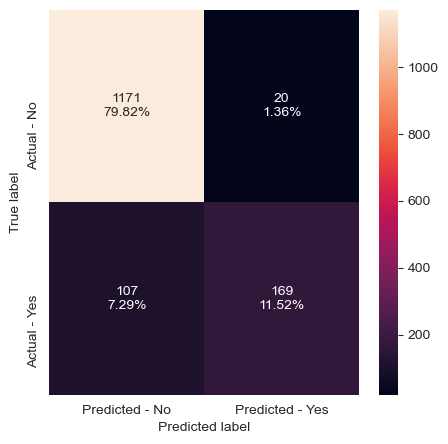

Accuracy on training set :  1.0
Accuracy on test set :  0.9134287661895024
Recall on training set :  1.0
Recall on test set :  0.6123188405797102
Precision on training set :  1.0
Precision on test set :  0.8941798941798942


In [111]:
confusion_matrix_metrics_summary(bagging_tuned)

* Accuracy and Recall has improved after tuning the Bagging Classifier.

---

In [112]:
# importance of features in the tree building
# (The importance of a feature is computed as the
# (normalized) total reduction of the criterion
# brought by that feature. It is also known as the Gini importance )

print(pd.DataFrame(bagging_tuned.feature_importances_, columns=[
      "Imp"], index=X_train.columns).sort_values(by='Imp', ascending=False))

                                           Imp
MonthlyIncome                         0.201928
Age                                   0.164571
NumberOfTrips                         0.087109
Designation_Executive                 0.065098
Passport                              0.061935
CityTier                              0.049254
PreferredPropertyStar                 0.046594
NumberOfChildrenVisited               0.036144
NumberOfPersonVisited                 0.033556
MaritalStatus_Single                  0.027599
OwnCar                                0.022226
MaritalStatus_Married                 0.019240
Occupation_Small Business             0.019075
MaritalStatus_Unmarried               0.018647
Occupation_Salaried                   0.018521
Occupation_Large Business             0.017495
Gender_Female                         0.017189
PreferredLoginDevice_Company Invited  0.016925
MaritalStatus_Divorced                0.016241
Gender_Male                           0.016222
PreferredLogi

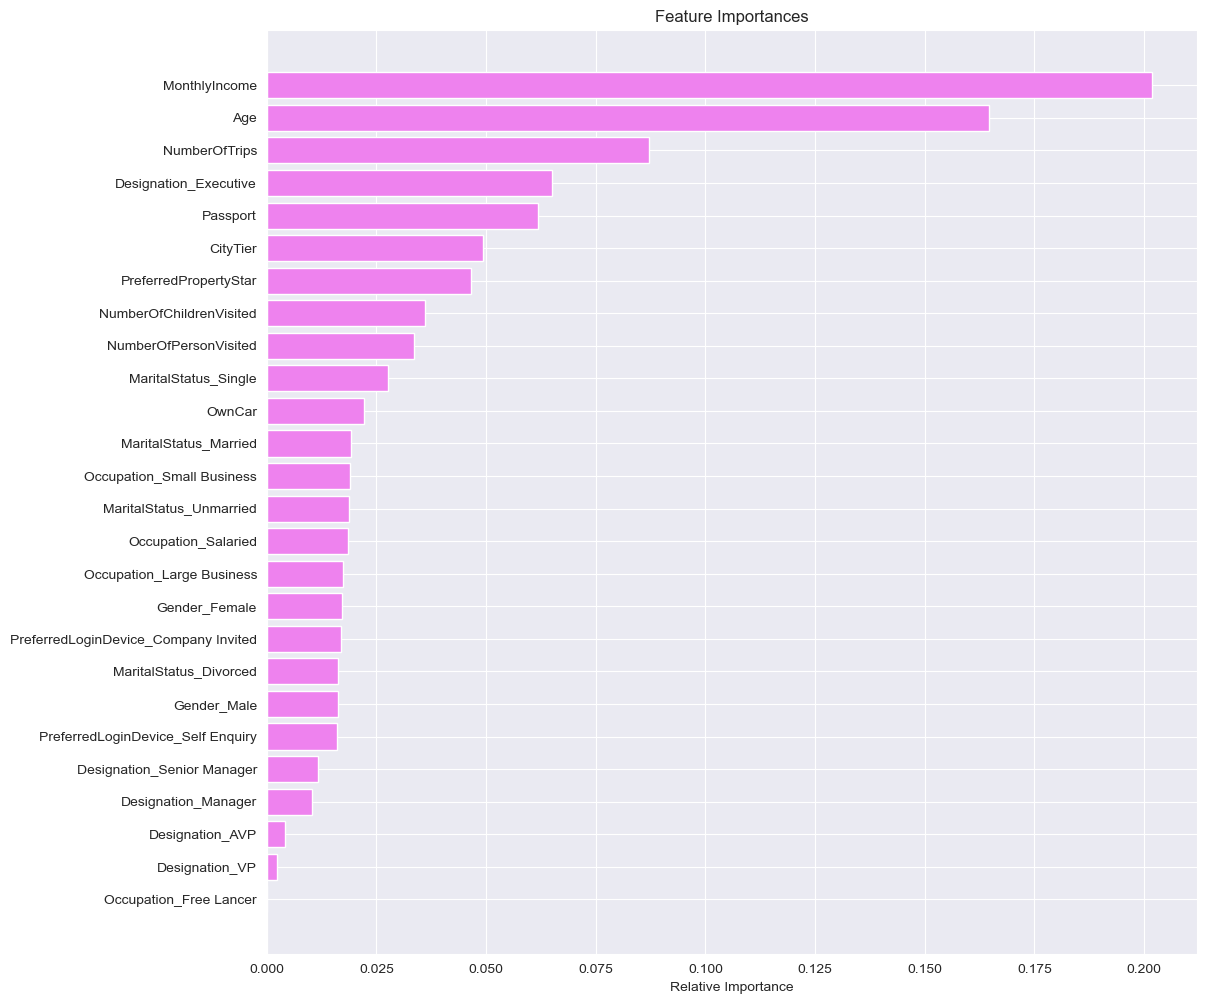

In [113]:
feature_names = X_train.columns
importances = bagging_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title('Feature Importances')
plt.barh(range(len(indices)),
         importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

---

## Random Forest Model

In [114]:
rf_estimator = RandomForestClassifier(random_state=1)
rf_estimator.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

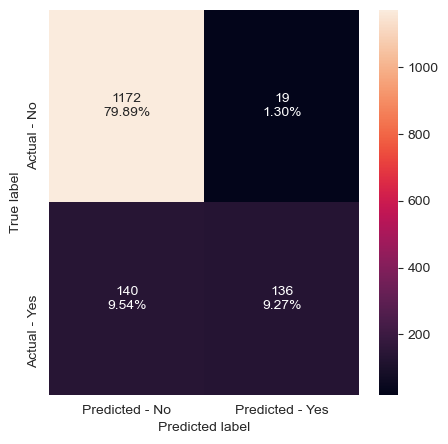

Accuracy on training set :  1.0
Accuracy on test set :  0.8916155419222904
Recall on training set :  1.0
Recall on test set :  0.4927536231884058
Precision on training set :  1.0
Precision on test set :  0.8774193548387097


In [115]:
confusion_matrix_metrics_summary(rf_estimator)

---

In [116]:
print(pd.DataFrame(rf_estimator.feature_importances_, columns=[
      "Imp"], index=X_train.columns).sort_values(by='Imp', ascending=False))

                                           Imp
MonthlyIncome                         0.167202
Age                                   0.156763
NumberOfTrips                         0.089317
Passport                              0.075652
PreferredPropertyStar                 0.053453
CityTier                              0.043669
NumberOfChildrenVisited               0.043628
NumberOfPersonVisited                 0.037330
Designation_Executive                 0.035024
OwnCar                                0.028770
MaritalStatus_Single                  0.026230
Occupation_Small Business             0.024684
Gender_Female                         0.023150
Occupation_Salaried                   0.022060
PreferredLoginDevice_Company Invited  0.021840
Gender_Male                           0.020525
MaritalStatus_Married                 0.020509
PreferredLoginDevice_Self Enquiry     0.019670
Occupation_Large Business             0.017610
Designation_Manager                   0.016933
MaritalStatus

---

### Hyperparameter Tuning

In [117]:
# Choose the type of classifier.
rf_tuned = RandomForestClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    'max_depth': [4, 6, 8, 10, None],
    'max_features': ['sqrt', 'log2', None],
    'n_estimators': [80, 90, 100, 110, 120]
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(rf_tuned, parameters, scoring=scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
rf_tuned.fit(X_train, y_train)

RandomForestClassifier(max_features=None, n_estimators=110, random_state=1)

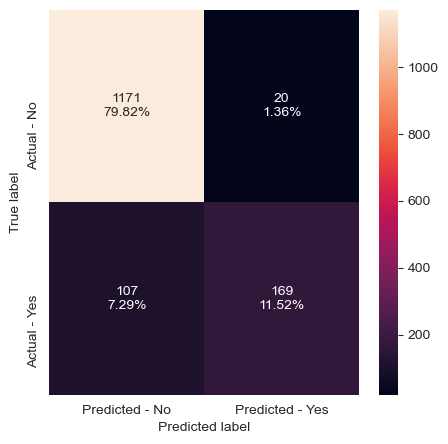

Accuracy on training set :  1.0
Accuracy on test set :  0.9134287661895024
Recall on training set :  1.0
Recall on test set :  0.6123188405797102
Precision on training set :  1.0
Precision on test set :  0.8941798941798942


In [118]:
confusion_matrix_metrics_summary(rf_tuned)

---

In [119]:
# importance of features in the tree building
# (The importance of a feature is computed as the
# (normalized) total reduction of the criterion
# brought by that feature. It is also known as the Gini importance )

print(pd.DataFrame(rf_tuned.feature_importances_, columns=[
      "Imp"], index=X_train.columns).sort_values(by='Imp', ascending=False))

                                           Imp
MonthlyIncome                         0.201928
Age                                   0.164571
NumberOfTrips                         0.087109
Designation_Executive                 0.065098
Passport                              0.061935
CityTier                              0.049254
PreferredPropertyStar                 0.046594
NumberOfChildrenVisited               0.036144
NumberOfPersonVisited                 0.033556
MaritalStatus_Single                  0.027599
OwnCar                                0.022226
MaritalStatus_Married                 0.019240
Occupation_Small Business             0.019075
MaritalStatus_Unmarried               0.018647
Occupation_Salaried                   0.018521
Occupation_Large Business             0.017495
Gender_Female                         0.017189
PreferredLoginDevice_Company Invited  0.016925
MaritalStatus_Divorced                0.016241
Gender_Male                           0.016222
PreferredLogi

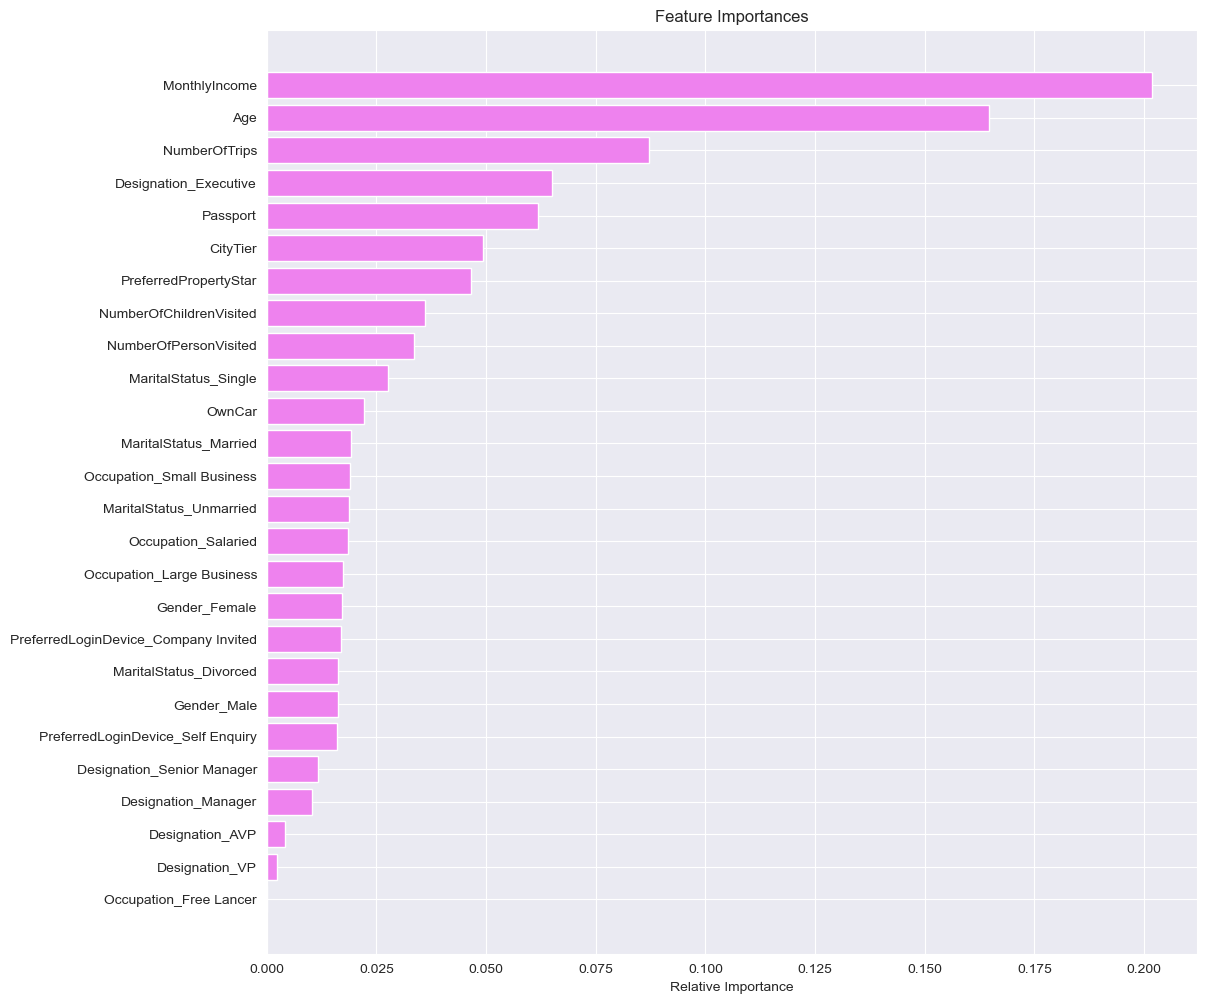

In [120]:
feature_names = X_train.columns
importances = rf_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title('Feature Importances')
plt.barh(range(len(indices)),
         importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

---

# Model Building - Boosting

Before model building is started, we must split the dataset into the Independent and Dependent variables.
* Independent variables - predictors
* Dependent variables - response

In this project, the response variable is the `ProdTaken` , and the predictors are all the other variables.

For **Boosting** we shall model using the data with outliers **data** and data without outliers **data_clean**

---

## Boosting - data with outliers

### Model Building Preparation

**Separating Independent and Dependent variables**

In [121]:
# Separating Independent and Dependent variables

# Independant variables
X = data.drop('ProdTaken', axis=1)
# Dependent variable
y = data['ProdTaken']

In [122]:
# Convert categorical variables to dummy variables
# Keep all dummy variables as the Bagging methods use Decision Trees
X = pd.get_dummies(X)

In [123]:
# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.30,
                                                    stratify=y,
                                                    random_state=1)

**Lets check Dependent variable ratio in split data**

In [124]:
print("Training True Values    : {0} ({1:0.2f}%)".format(
    len(y_train[y_train[:] == 1]),
    (len(y_train[y_train[:] == 1]) / len(y_train)) * 100))
print("Training False Values   : {0} ({1:0.2f}%)".format(
    len(y_train[y_train[:] == 0]),
    (len(y_train[y_train[:] == 0]) / len(y_train)) * 100))

print('--' * 55)

print("Test True Values        : {0} ({1:0.2f}%)".format(
    len(y_test[y_test[:] == 1]),
    (len(y_test[y_test[:] == 1]) / len(y_test)) * 100))
print("Test False Values       : {0} ({1:0.2f}%)".format(
    len(y_test[y_test[:] == 0]),
    (len(y_test[y_test[:] == 0]) / len(y_test)) * 100))

Training True Values    : 644 (18.82%)
Training False Values   : 2777 (81.18%)
--------------------------------------------------------------------------------------------------------------
Test True Values        : 276 (18.81%)
Test False Values       : 1191 (81.19%)


---

### AdaBoost 

In [125]:
ab_classifer=AdaBoostClassifier(random_state=1)
ab_classifer.fit(X_train,y_train)

AdaBoostClassifier(random_state=1)

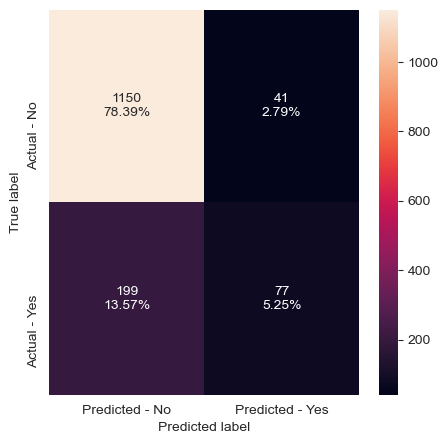

Accuracy on training set :  0.8439052908506285
Accuracy on test set :  0.83640081799591
Recall on training set :  0.281055900621118
Recall on test set :  0.27898550724637683
Precision on training set :  0.7182539682539683
Precision on test set :  0.652542372881356


In [126]:
confusion_matrix_metrics_summary(ab_classifer)

* AdaBoost is not overfitting the data, producing good Accuracy but extremely poor Recall scores.

---

#### Hyperparameter Tuning

In [127]:
# Choose the type of classifier. 
ab_tuned = AdaBoostClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {'n_estimators': np.arange(10,100,10), 
              'learning_rate': [1, 0.1, 0.5, 0.01],
              }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(ab_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
ab_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
ab_tuned.fit(X_train, y_train)

AdaBoostClassifier(learning_rate=1, n_estimators=90, random_state=1)

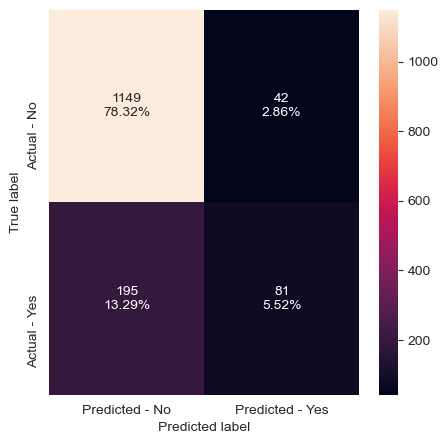

Accuracy on training set :  0.8468284127448115
Accuracy on test set :  0.8384458077709611
Recall on training set :  0.29347826086956524
Recall on test set :  0.29347826086956524
Precision on training set :  0.7325581395348837
Precision on test set :  0.6585365853658537


In [128]:
confusion_matrix_metrics_summary(ab_tuned)

* There is no significant increase in scores due to Hyperparameter tuning of AdaBoost.

---

### Gradient Boosting 

In [129]:
gb_estimator=GradientBoostingClassifier(random_state=1)
gb_estimator.fit(X_train,y_train)

GradientBoostingClassifier(random_state=1)

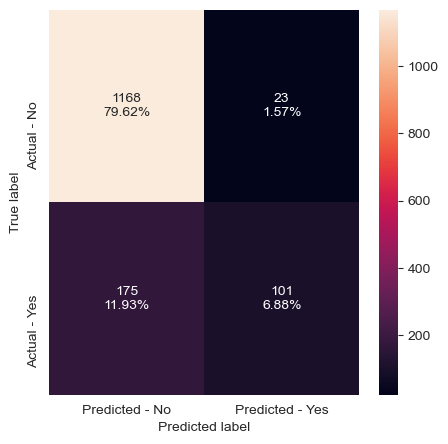

Accuracy on training set :  0.881613563285589
Accuracy on test set :  0.8650306748466258
Recall on training set :  0.4363354037267081
Recall on test set :  0.36594202898550726
Precision on training set :  0.8699690402476781
Precision on test set :  0.8145161290322581


In [130]:
confusion_matrix_metrics_summary(gb_estimator)

* Gradient Boosting is not overfitting the data, producing good Accuracy but poor Recall scores although better than AdaBoost.

---

#### Hyperparameter Tuning

In [131]:
# Choose the type of classifier. 
gb_tuned = GradientBoostingClassifier(random_state=1)

# Grid of parameters to choose from

parameters = {'n_estimators': np.arange(50,200,25), 
              'subsample':[0.7,0.8,0.9,1],
              'max_features':[0.7,0.8,0.9,1],
              'max_depth':[3,5,7,10]
              }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(gb_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
gb_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
gb_tuned.fit(X_train, y_train)

GradientBoostingClassifier(max_depth=7, max_features=0.7, n_estimators=175,
                           random_state=1, subsample=1)

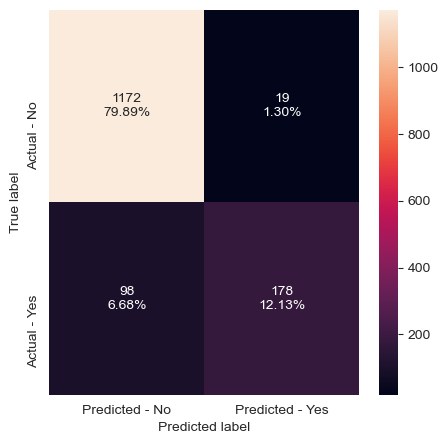

Accuracy on training set :  1.0
Accuracy on test set :  0.9202453987730062
Recall on training set :  1.0
Recall on test set :  0.644927536231884
Precision on training set :  1.0
Precision on test set :  0.9035532994923858


In [132]:
confusion_matrix_metrics_summary(gb_tuned)

---

### XGBoost

In [133]:
xgb_estimator=XGBClassifier(random_state=1, eval_metric = 'logloss')
xgb_estimator.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='logloss',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=12,
              num_parallel_tree=1, random_state=1, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

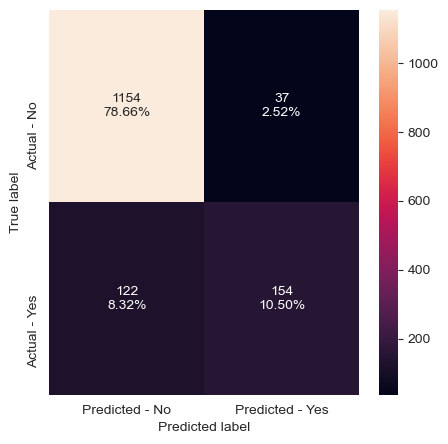

Accuracy on training set :  0.9959076293481438
Accuracy on test set :  0.8916155419222904
Recall on training set :  0.9782608695652174
Recall on test set :  0.5579710144927537
Precision on training set :  1.0
Precision on test set :  0.806282722513089


In [134]:
confusion_matrix_metrics_summary(xgb_estimator)

---

#### Hyperparameter Tuning

In [136]:
# Choose the type of classifier. 
xgb_tuned = XGBClassifier(random_state=1,eval_metric = 'logloss')

# Grid of parameters to choose from
parameters = {'n_estimators': [75,100,125,150], 
              'subsample':[0.7, 0.8, 0.9, 1],
              'gamma':[0, 1, 3, 5],
              'colsample_bytree':[0.7, 0.8, 0.9, 1],
              'colsample_bylevel':[0.7, 0.8, 0.9, 1]
              }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(xgb_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
xgb_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
xgb_tuned.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=0.8,
              colsample_bynode=1, colsample_bytree=0.9, eval_metric='logloss',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=150, n_jobs=12,
              num_parallel_tree=1, random_state=1, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

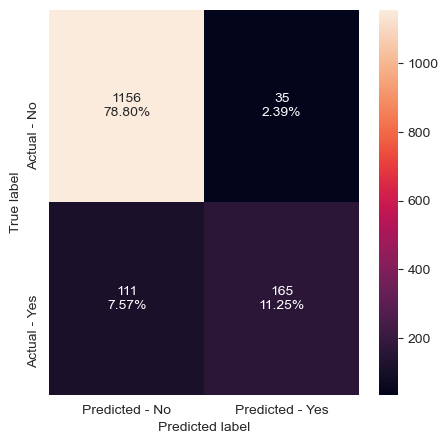

Accuracy on training set :  0.9988307512423268
Accuracy on test set :  0.9004771642808452
Recall on training set :  0.9937888198757764
Recall on test set :  0.5978260869565217
Precision on training set :  1.0
Precision on test set :  0.825


In [137]:
confusion_matrix_metrics_summary(xgb_tuned)

* Tuned XGBoost has produced a high test set Accuracy and Recall. There has been a 4% increase in Recall score.

---

In [138]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print(pd.DataFrame(xgb_tuned.feature_importances_, columns=[
      "Imp"], index=X_train.columns).sort_values(by='Imp', ascending=False))

                                           Imp
Designation_Executive                 0.114874
Passport                              0.090946
MaritalStatus_Single                  0.060041
Designation_AVP                       0.055378
PreferredLoginDevice_Self Enquiry     0.046155
MaritalStatus_Unmarried               0.046079
MaritalStatus_Divorced                0.045678
CityTier                              0.043386
Occupation_Large Business             0.041551
MaritalStatus_Married                 0.033344
PreferredLoginDevice_Company Invited  0.032203
NumberOfTrips                         0.031700
PreferredPropertyStar                 0.031455
Occupation_Small Business             0.031141
Age                                   0.030704
Designation_Senior Manager            0.030014
MonthlyIncome                         0.029826
Designation_Manager                   0.029041
Gender_Female                         0.028583
Designation_VP                        0.028494
Gender_Male  

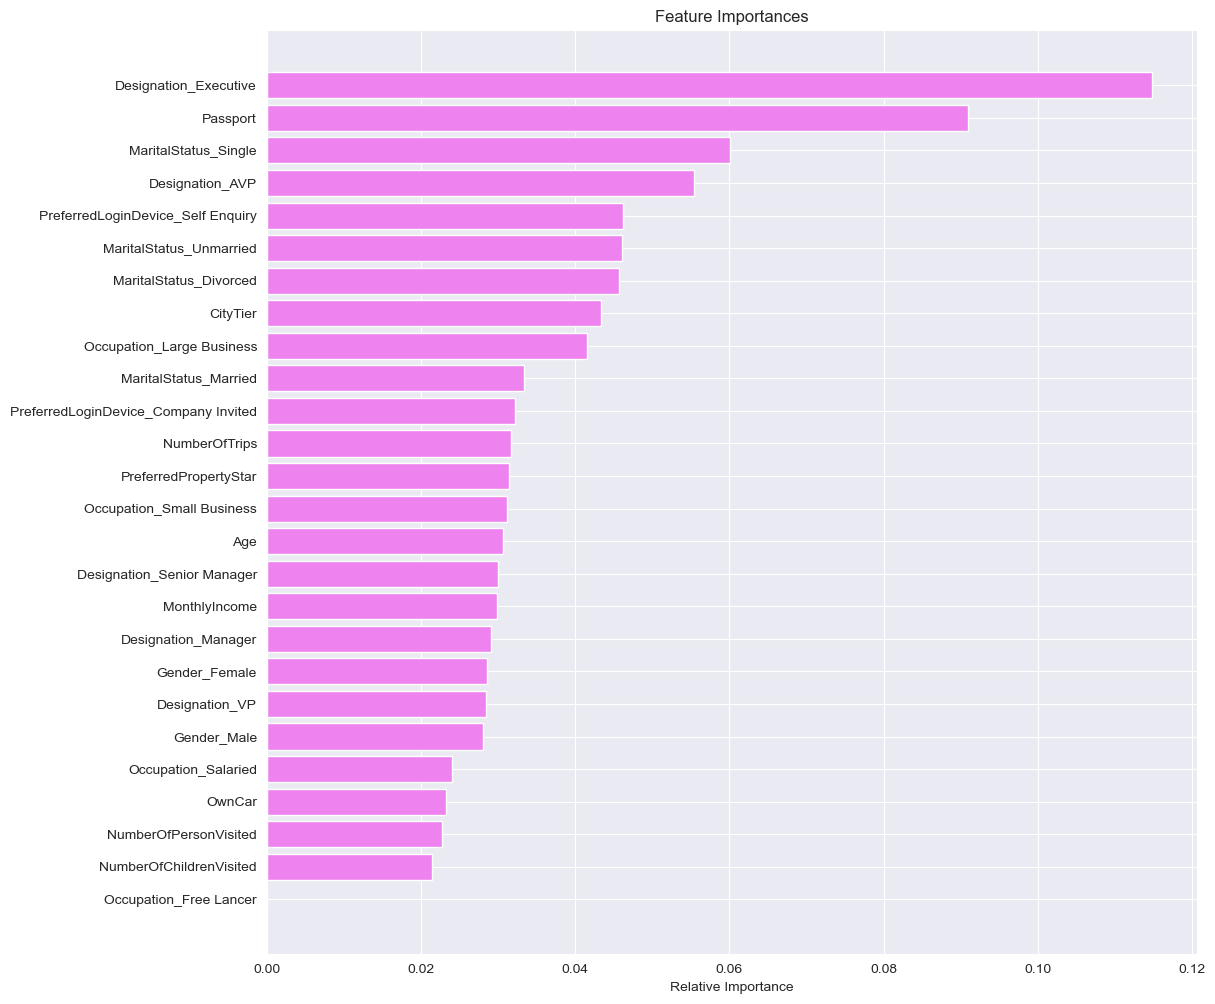

In [139]:
feature_names = X_train.columns
importances = xgb_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

---

## Boosting - data WITHOUT Outliers

Since Boosting is affected by outliers, we have cloned and cleaned the data. The dataframe **data_clean** will be used in the following analysis.

### Model Building Preparation

**Separating Independent and Dependent variables**

In [140]:
# Separating Independent and Dependent variables (data_clean)

# Independant variables
X = data_clean.drop('ProdTaken', axis=1)
# Dependent variable
y = data_clean['ProdTaken']

In [141]:
# Convert categorical variables to dummy variables
# Keep all dummy variables as the Bagging methods use Decision Trees
X = pd.get_dummies(X)

In [142]:
# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.30,
                                                    stratify=y,
                                                    random_state=1)

**Lets check Dependent variable ratio in split data**

In [143]:
print("Training True Values    : {0} ({1:0.2f}%)".format(
    len(y_train[y_train[:] == 1]),
    (len(y_train[y_train[:] == 1]) / len(y_train)) * 100))
print("Training False Values   : {0} ({1:0.2f}%)".format(
    len(y_train[y_train[:] == 0]),
    (len(y_train[y_train[:] == 0]) / len(y_train)) * 100))

print('--' * 55)

print("Test True Values        : {0} ({1:0.2f}%)".format(
    len(y_test[y_test[:] == 1]),
    (len(y_test[y_test[:] == 1]) / len(y_test)) * 100))
print("Test False Values       : {0} ({1:0.2f}%)".format(
    len(y_test[y_test[:] == 0]),
    (len(y_test[y_test[:] == 0]) / len(y_test)) * 100))

Training True Values    : 644 (18.82%)
Training False Values   : 2777 (81.18%)
--------------------------------------------------------------------------------------------------------------
Test True Values        : 276 (18.81%)
Test False Values       : 1191 (81.19%)


---

### AdaBoost 

In [144]:
ab_classifer=AdaBoostClassifier(random_state=1)
ab_classifer.fit(X_train,y_train)

AdaBoostClassifier(random_state=1)

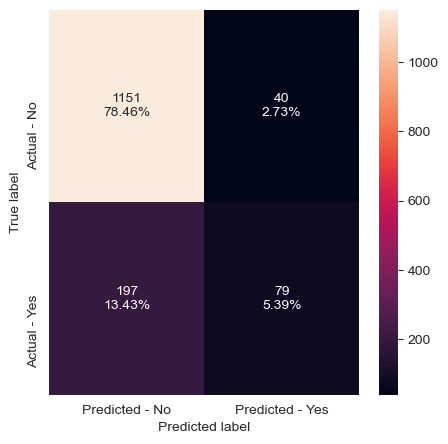

Accuracy on training set :  0.8439052908506285
Accuracy on test set :  0.8384458077709611
Recall on training set :  0.281055900621118
Recall on test set :  0.286231884057971
Precision on training set :  0.7182539682539683
Precision on test set :  0.6638655462184874


In [145]:
confusion_matrix_metrics_summary(ab_classifer)

* AdaBoost is not overfitting the data, producing good Accuracy but extremely poor Recall scores.

---

#### Hyperparameter Tuning

In [146]:
# Choose the type of classifier. 
ab_tuned = AdaBoostClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {'n_estimators': np.arange(10,100,10), 
              'learning_rate': [1, 0.1, 0.5, 0.01],
              }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(ab_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
ab_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
ab_tuned.fit(X_train, y_train)

AdaBoostClassifier(learning_rate=1, n_estimators=70, random_state=1)

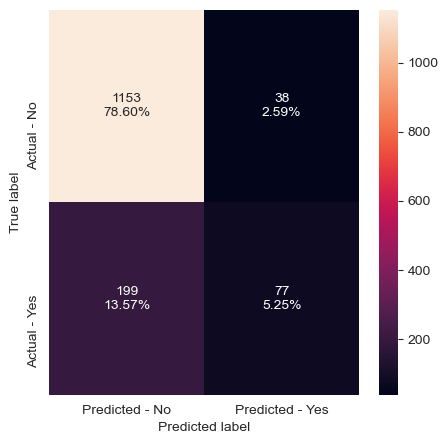

Accuracy on training set :  0.8456591639871383
Accuracy on test set :  0.8384458077709611
Recall on training set :  0.2826086956521739
Recall on test set :  0.27898550724637683
Precision on training set :  0.7338709677419355
Precision on test set :  0.6695652173913044


In [147]:
confusion_matrix_metrics_summary(ab_tuned)

* There is no significant increase in scores due to Hyperparameter tuning of AdaBoost.

---

In [148]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print(pd.DataFrame(ab_tuned.feature_importances_, columns=[
      "Imp"], index=X_train.columns).sort_values(by='Imp', ascending=False))

                                           Imp
MonthlyIncome                         0.557143
Age                                   0.185714
NumberOfTrips                         0.042857
PreferredPropertyStar                 0.028571
Passport                              0.028571
Designation_Executive                 0.028571
NumberOfPersonVisited                 0.014286
Designation_Senior Manager            0.014286
PreferredLoginDevice_Self Enquiry     0.014286
Designation_AVP                       0.014286
Occupation_Large Business             0.014286
CityTier                              0.014286
MaritalStatus_Unmarried               0.014286
MaritalStatus_Single                  0.014286
Gender_Male                           0.014286
Designation_Manager                   0.000000
MaritalStatus_Married                 0.000000
Occupation_Salaried                   0.000000
MaritalStatus_Divorced                0.000000
Gender_Female                         0.000000
Occupation_Sm

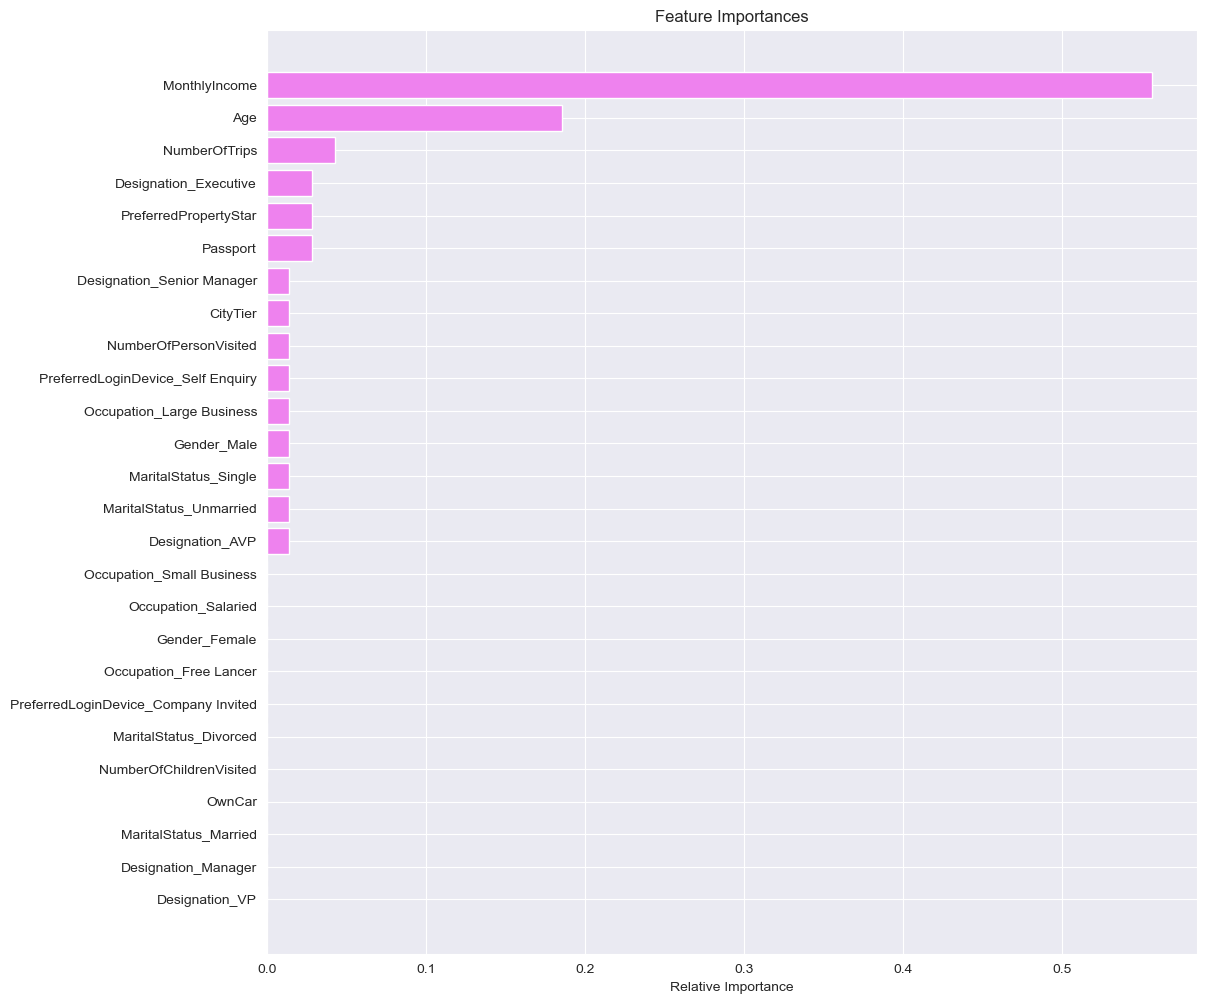

In [149]:
feature_names = X_train.columns
importances = ab_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

---

### Gradient Boosting 

In [150]:
gb_estimator=GradientBoostingClassifier(random_state=1)
gb_estimator.fit(X_train,y_train)

GradientBoostingClassifier(random_state=1)

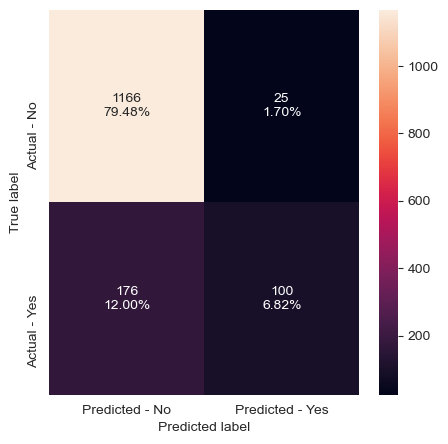

Accuracy on training set :  0.8786904413914061
Accuracy on test set :  0.8629856850715747
Recall on training set :  0.42857142857142855
Recall on test set :  0.36231884057971014
Precision on training set :  0.8544891640866873
Precision on test set :  0.8


In [151]:
confusion_matrix_metrics_summary(gb_estimator)

* Gradient Boosting is not overfitting the data, producing good Accuracy but poor Recall scores although better than AdaBoost.

---

#### Hyperparameter Tuning

In [152]:
# Choose the type of classifier. 
gb_tuned = GradientBoostingClassifier(random_state=1)

# Grid of parameters to choose from

# parameters = {'n_estimators': np.arange(10,100,10), 
#               'learning_rate': [1, 0.1, 0.5, 0.01],
#               }

parameters = {'n_estimators': np.arange(50,200,25), 
              'subsample':[0.7,0.8,0.9,1],
              'max_features':[0.7,0.8,0.9,1],
              'max_depth':[3,5,7,10]
              }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(gb_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
gb_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
gb_tuned.fit(X_train, y_train)

GradientBoostingClassifier(max_depth=10, max_features=0.9, n_estimators=175,
                           random_state=1, subsample=1)

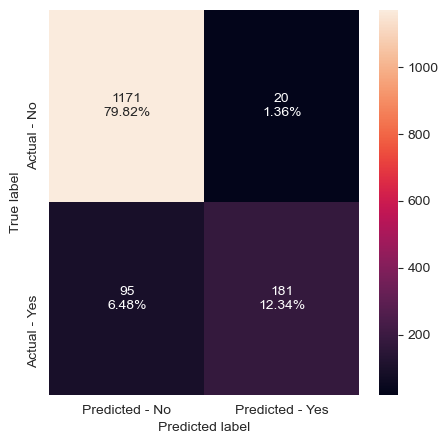

Accuracy on training set :  1.0
Accuracy on test set :  0.9216087252897068
Recall on training set :  1.0
Recall on test set :  0.6557971014492754
Precision on training set :  1.0
Precision on test set :  0.900497512437811


In [153]:
confusion_matrix_metrics_summary(gb_tuned)

---

In [154]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print(pd.DataFrame(gb_tuned.feature_importances_, columns=[
      "Imp"], index=X_train.columns).sort_values(by='Imp', ascending=False))

                                           Imp
MonthlyIncome                         0.210277
Age                                   0.169899
NumberOfTrips                         0.082495
Designation_Executive                 0.070976
Passport                              0.061418
CityTier                              0.050636
PreferredPropertyStar                 0.047984
NumberOfChildrenVisited               0.032846
NumberOfPersonVisited                 0.028376
MaritalStatus_Single                  0.023166
OwnCar                                0.021374
MaritalStatus_Married                 0.019909
Gender_Male                           0.019149
MaritalStatus_Divorced                0.017307
Gender_Female                         0.017155
Occupation_Small Business             0.016367
PreferredLoginDevice_Company Invited  0.016272
Occupation_Large Business             0.015708
Occupation_Salaried                   0.015252
PreferredLoginDevice_Self Enquiry     0.015241
MaritalStatus

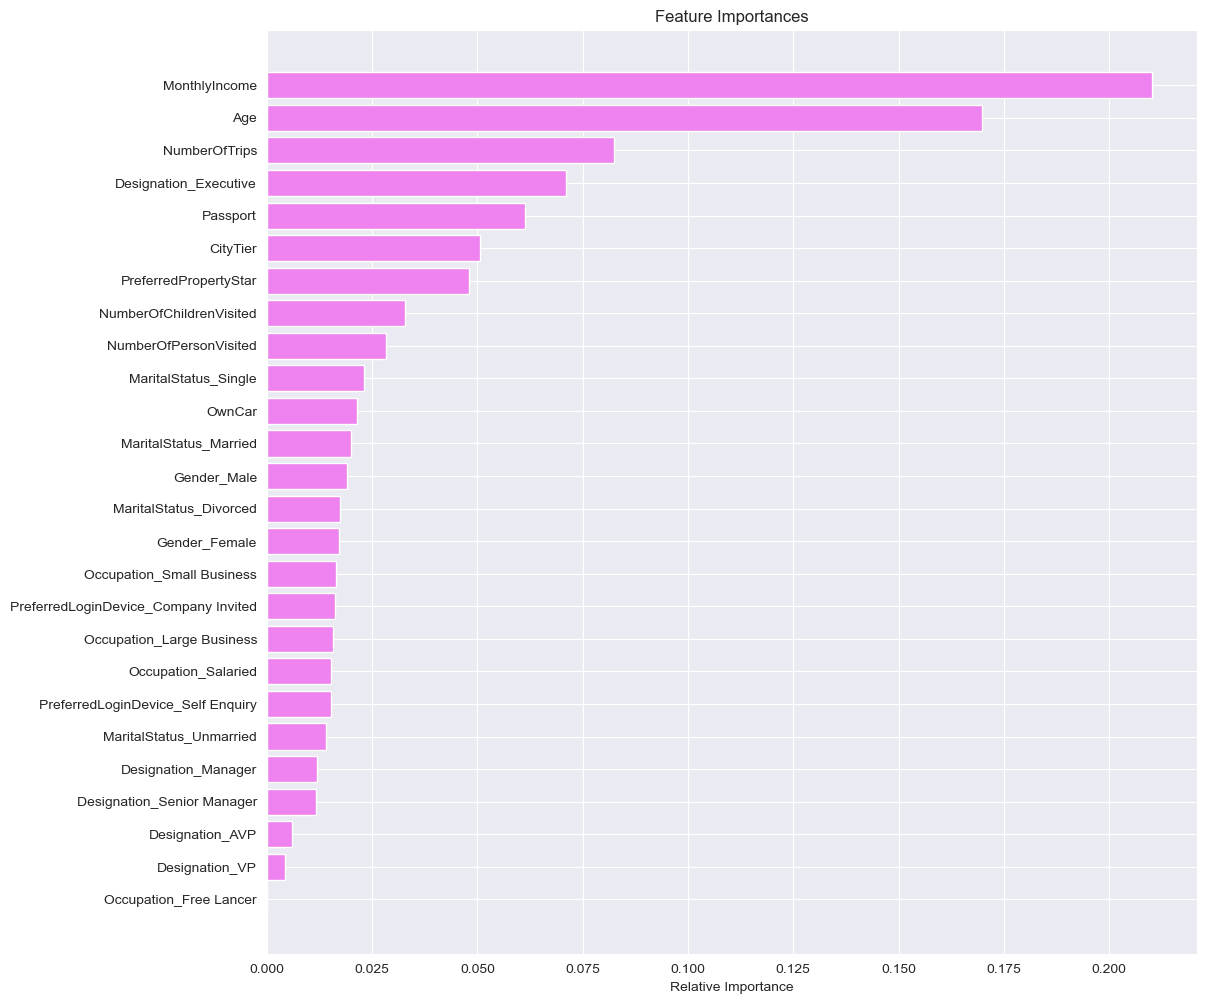

In [155]:
feature_names = X_train.columns
importances = gb_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

---

### XGBoost

In [156]:
xgb_estimator=XGBClassifier(random_state=1, eval_metric = 'logloss')
xgb_estimator.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='logloss',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=12,
              num_parallel_tree=1, random_state=1, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

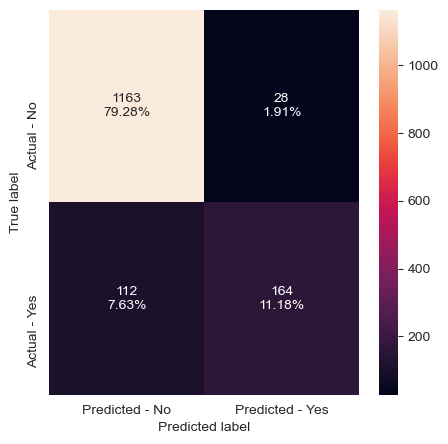

Accuracy on training set :  0.9973691902952353
Accuracy on test set :  0.9045671438309475
Recall on training set :  0.9860248447204969
Recall on test set :  0.5942028985507246
Precision on training set :  1.0
Precision on test set :  0.8541666666666666


In [157]:
confusion_matrix_metrics_summary(xgb_estimator)

---

#### Hyperparameter Tuning

In [158]:
# Choose the type of classifier. 
xgb_tuned = XGBClassifier(random_state=1,eval_metric = 'logloss')

# Grid of parameters to choose from
parameters = {'n_estimators': [75,100,125,150], 
              'subsample':[0.7, 0.8, 0.9, 1],
              'gamma':[0, 1, 3, 5],
              'colsample_bytree':[0.7, 0.8, 0.9, 1],
              'colsample_bylevel':[0.7, 0.8, 0.9, 1]
              }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(xgb_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
xgb_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
xgb_tuned.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=0.9,
              colsample_bynode=1, colsample_bytree=0.7, eval_metric='logloss',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=150, n_jobs=12,
              num_parallel_tree=1, random_state=1, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

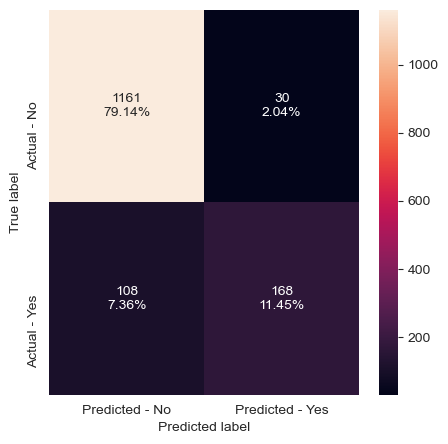

Accuracy on training set :  0.9994153756211634
Accuracy on test set :  0.9059304703476483
Recall on training set :  0.9968944099378882
Recall on test set :  0.6086956521739131
Precision on training set :  1.0
Precision on test set :  0.8484848484848485


In [159]:
confusion_matrix_metrics_summary(xgb_tuned)

* Tuned XGBoost has produced a high test set Accuracy and Recall. There has been a 4% increase in Recall score.

---

In [160]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print(pd.DataFrame(xgb_tuned.feature_importances_, columns=[
      "Imp"], index=X_train.columns).sort_values(by='Imp', ascending=False))

                                           Imp
Passport                              0.100653
Designation_Executive                 0.099793
MaritalStatus_Single                  0.059437
MaritalStatus_Divorced                0.057028
PreferredLoginDevice_Self Enquiry     0.048990
MaritalStatus_Unmarried               0.045857
Occupation_Large Business             0.041695
CityTier                              0.040531
MaritalStatus_Married                 0.038803
PreferredPropertyStar                 0.032825
PreferredLoginDevice_Company Invited  0.032582
MonthlyIncome                         0.031861
Designation_Senior Manager            0.031834
Gender_Male                           0.031805
Age                                   0.031471
Gender_Female                         0.031165
Occupation_Small Business             0.030948
Designation_AVP                       0.030214
NumberOfTrips                         0.029756
Occupation_Salaried                   0.029378
Designation_M

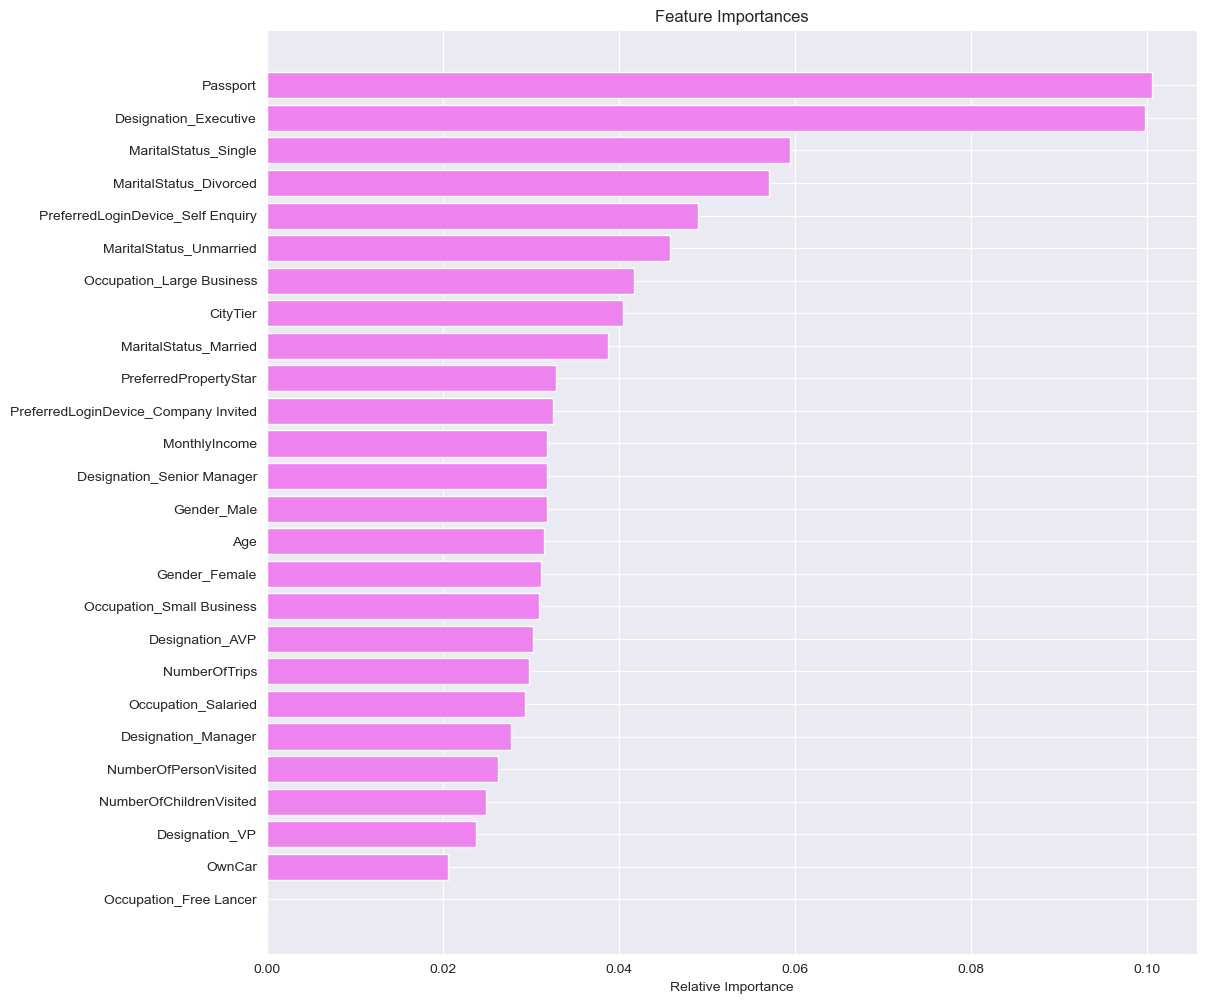

In [161]:
feature_names = X_train.columns
importances = xgb_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

---

# Stacking Model

**Now, let's build a stacking model with the tuned models - Decision tree, Random forest, AdaBoosting and gradient boosting, then use XGBoost to get the final prediction.**

In [162]:
estimators = [('Decision Tree', dtree_gridCV),
              ('Random Forest', rf_tuned),
#               ('AdaBoost', ab_tuned),
              ('Gradient Boosting', gb_tuned)]
final_estimator = XGBClassifier(random_state=1,eval_metric = 'logloss')

In [163]:
stacking_estimator = StackingClassifier(
    estimators=estimators, final_estimator=final_estimator, cv=5)
stacking_estimator.fit(X_train, y_train)

StackingClassifier(cv=5,
                   estimators=[('Decision Tree', DecisionTreeClassifier()),
                               ('Random Forest',
                                RandomForestClassifier(max_features=None,
                                                       n_estimators=110,
                                                       random_state=1)),
                               ('Gradient Boosting',
                                GradientBoostingClassifier(max_depth=10,
                                                           max_features=0.9,
                                                           n_estimators=175,
                                                           random_state=1,
                                                           subsample=1))],
                   final_estimator=XGBClassifier(base_score=None, booster=Non...
                                                 importance_type='gain',
                                              

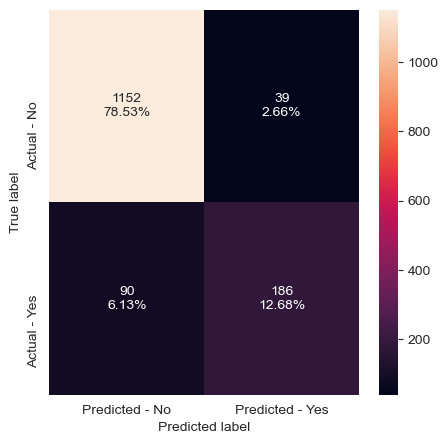

Accuracy on training set :  0.997953814674072
Accuracy on test set :  0.9120654396728016
Recall on training set :  0.9906832298136646
Recall on test set :  0.6739130434782609
Precision on training set :  0.9984350547730829
Precision on test set :  0.8266666666666667


In [164]:
confusion_matrix_metrics_summary(stacking_estimator)

---

---